In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [31]:
csvfile = "cleandata7.csv"
data = pd.read_csv(csvfile)
data.head()

,sale,Day(Report Date),ID,week,year,u,p,Lift_DOD,change in p,Lift_retail,Lift_2DOD,Lift_2retail,Size
0,607.4,4/16/17,15739134,12,2018,3,202.466667,2.0,1,0.000000,0.000000,0.000000,40
1,397.96,4/21/17,15739134,12,2018,2,198.980000,1.0,0,-0.017221,0.000000,0.000000,40
2,390,4/22/17,15739134,13,2018,2,195.000000,0.0,1,-0.020002,-0.333333,-0.036878,40
3,390,4/23/17,15739134,13,2018,2,195.000000,0.0,0,0.000000,0.000000,-0.020002,40
4,"3,315",4/24/17,15739134,13,2018,17,195.000000,7.5,0,0.000000,7.500000,0.000000,40


In [32]:
data["ID"].size

94330

In [33]:
x = data[["Lift_retail", "Size", "p", "week"]]
y = data["u"].values

In [34]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)


In [35]:
# from sklearn.preprocessing import StandardScaler

# # # Create a StandardScater model and fit it to the training data

# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)


In [36]:
# # Transform the training and testing data using the X_scaler and y_scaler models

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)


In [37]:
# n_samples = 5000
# n_features = 3
# x = data[["AUR TY", "size", "WM Week #"]]
# y = data["Units"]
# #y = data["Units"].values.reshape(-1, 1)


model = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

# try SGD regressor
# model = linear_model.SGDRegressor()
model.fit(X_train, y_train)

# # try nearest
# from sklearn.neighbors import NearestNeighbors


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [38]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({"Predicted": predictions, "Actual": y_test, "Error": predictions - y_test})[["Predicted", "Actual", "Error"]] 
comparison.head(40)

# print(predictions)

,Predicted,Actual,Error
0,8.651127,25,-16.348873
1,18.525177,14,4.525177
2,19.925000,10,9.925000
3,24.264753,5,19.264753
4,11.107923,14,-2.892077
5,9.298344,5,4.298344
6,5.427387,7,-1.572613
7,40.605449,2,38.605449
8,97.541505,77,20.541505
9,3.854000,2,1.854000


[]

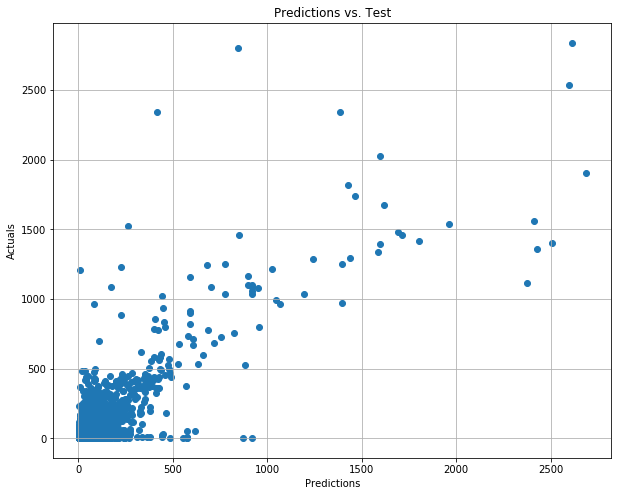

In [50]:
plt.figure(figsize=(10,8))
plt.scatter(predictions, y_test)
plt.title("Predictions vs. Test")
plt.ylabel("Actuals")
plt.xlabel("Predictions")
plt.grid(True)
plt.plot()

In [ ]:
print(predictions)

In [ ]:
print(y_test)

Notes from prev test

In [51]:
score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.7023864286188212


In [40]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmsle(predictions, y_test):
    return np.sqrt(mean_squared_error(predictions, y_test))

In [41]:
mean_squared_error(comparison["Predicted"], comparison["Actual"], multioutput='raw_values')

array([ 1956.66174783])